# EDA stocks for dummies

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

In [2]:
data_dir = "../data/kaggle_stock_data/stocks/"

In [4]:
stock_files = os.listdir(data_dir)

In [5]:
len(stock_files)

5884

In [10]:
n_stocks = 5
random_stock_files = [os.path.join(data_dir,x) for x in random.sample(stock_files,n_stocks)]

In [40]:
all_dfs = []
for file in random_stock_files:
    tmp_df = pd.read_csv(file)
    file_name = file.split("/")[-1]
    stock_name = file_name.split(".")[0]
    tmp_df['stock_name'] = stock_name
    all_dfs.append(tmp_df)

In [41]:
df = pd.concat(all_dfs)

In [42]:
df['stock_name'].unique()

array(['TREX', 'GAIN', 'TARO', 'BFYT', 'FNKO'], dtype=object)

In [43]:
df.shape

(19112, 8)

In [44]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
stock_name    0
dtype: int64

In [45]:
min_date = min(df['Date'])
max_date = max(df['Date'])
print(f"Start date: {min_date}\nEnd date: {max_date}")

Start date: 1982-09-14
End date: 2020-04-01


In [46]:
df.head(n=3)

,Date,Open,High,Low,Close,Adj Close,Volume,stock_name
0,1999-04-08,2.5000,3.12500,2.500000,2.84375,2.84375,3577200,TREX
1,1999-04-09,3.0625,3.46875,3.015625,3.21875,3.21875,1336400,TREX
2,1999-04-12,3.2500,3.40625,3.140625,3.25000,3.25000,763200,TREX


In [47]:
df['Date'] = pd.to_datetime(df['Date'])

In [31]:
# df['Date'] = df['Date'].dt.to_period("D")

In [48]:
df.head(n=3)

,Date,Open,High,Low,Close,Adj Close,Volume,stock_name
0,1999-04-08,2.5000,3.12500,2.500000,2.84375,2.84375,3577200,TREX
1,1999-04-09,3.0625,3.46875,3.015625,3.21875,3.21875,1336400,TREX
2,1999-04-12,3.2500,3.40625,3.140625,3.25000,3.25000,763200,TREX


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19112 entries, 0 to 605
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        19112 non-null  datetime64[ns]
 1   Open        19112 non-null  float64       
 2   High        19112 non-null  float64       
 3   Low         19112 non-null  float64       
 4   Close       19112 non-null  float64       
 5   Adj Close   19112 non-null  float64       
 6   Volume      19112 non-null  int64         
 7   stock_name  19112 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 1.3+ MB


In [54]:
df_sub = df[(df['Date'].dt.year==2019)]

In [55]:
df_sub.shape

(1026, 8)

In [56]:
df_sub = df_sub[df_sub['stock_name']==df_sub['stock_name'].unique().tolist()[0]]

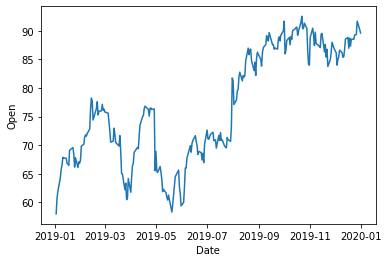

In [57]:
plot = sns.lineplot(x=df_sub['Date'],y=df_sub['Open'])